Synchronize DLC results with xr_session

In [155]:
from trialexp.process.deeplabcut import utils as dlc_utils
import pandas as pd
import xarray as xr
import matplotlib.pylab as plt
import numpy as np

In [14]:
fn = '06-14-23_14-40-49.000_TT002_Rig_3_Side_recode'
session_path = '/home/MRC.OX.AC.UK/ndcn1330/ettin/Julien/Data/head-fixed/by_sessions/reaching_go_spout_bar_nov22/TT002-2023-06-14-144112/'
videofile = session_path +f'video/{fn}.mp4'

# Load DLC results

In [6]:
dftip = pd.read_pickle('dftip.pkl')
dfwrist = pd.read_pickle('dfwrist.pkl')

In [7]:
ts = dlc_utils.extract_video_timestamp(videofile)


In [31]:
dfwrist['time'] = ts
dftip['time'] = ts

In [32]:
dfwrist = dfwrist.set_index('time')
dftip = dftip.set_index('time')

## Synchronize with the xr_session

In [53]:
xr_session = xr.open_dataset(session_path+'/processed/xr_session.nc')

In [54]:
xr_session

<xarray.Dataset>
Dimensions:                           (session_id: 1, trial_nb: 237,
                                       time: 176428, event_time: 500)
Coordinates:
  * session_id                        (session_id) object 'TT002-2023-06-14-1...
  * trial_nb                          (trial_nb) int64 1 2 3 4 ... 235 236 237
  * time                              (time) float64 7.608e+03 ... 1.772e+06
  * event_time                        (event_time) int64 -1995 -1985 ... 2995
Data variables: (12/30)
    uid                               (session_id, trial_nb) object ...
    trigger                           (session_id, trial_nb) object ...
    valid                             (session_id, trial_nb) bool ...
    break_after_abort                 (session_id, trial_nb) bool ...
    US_end_timer                      (session_id, trial_nb) bool ...
    water_on                          (session_id, trial_nb) bool ...
    ...                                ...
    zscored_df_over_f                 (session_id, time) float64 ...
    trial                             (session_id, time) float64 ...
    hold_for_water_zscored_df_over_f  (session_id, trial_nb, event_time) float64 ...
    first_bar_off_zscored_df_over_f   (session_id, trial_nb, event_time) float64 ...
    first_spout_zscored_df_over_f     (session_id, trial_nb, event_time) float64 ...
    last_bar_off_zscored_df_over_f    (session_id, trial_nb, event_time) float64 ...
Attributes: (12/25)
    pulse_inds_1:         []
    pulse_inds_2:         [  24540   33979   42180   50527   56813   61995   ...
    pulse_times_1:        []
    pulse_times_2:        [  24540.   33979.   42180.   50527.   56813.   619...
    subject_ID:           TT002
    date_time:            2023-06-14T14:40:47
    ...                   ...
    Start date:           2023/06/14 14:41:12
    session_id:           TT002-2023-06-14-144112
    trial_window:         [-2000.  3000.]
    conditions:           ['break_after_abort', 'US_end_timer', 'water_on', '...
    triggers:             hold_for_water
    events_to_process:    ['bar', 'bar_off', 'spout', 'US_end_timer']

In [55]:
xr_session.time

<xarray.DataArray 'time' (time: 176428)>
array([   7608.5,    7618.5,    7628.5, ..., 1771847.5, 1771857.5, 1771867.5])
Coordinates:
  * time     (time) float64 7.608e+03 7.618e+03 ... 1.772e+06 1.772e+06

In [49]:
xr_dlc = xr.DataArray([dfwrist,dftip], dims=('marker','time','coords'),
                 coords={'marker':['wrist','tip'],
                         'time':dfwrist.index,
                         'coords':['x','y','likelihood']
                 })

In [59]:
# resample to the xr_session time
xr_dlc = xr_dlc.interp(time=xr_session.time)

In [66]:
xr_dlc.loc['wrist',:,'x']

<xarray.DataArray (time: 176428)>
array([866.01923643, 866.03339213, 866.07619016, ..., 856.75124686,
       856.54053506, 856.32098556])
Coordinates:
    marker   <U5 'wrist'
    coords   <U10 'x'
  * time     (time) float64 7.608e+03 7.618e+03 ... 1.772e+06 1.772e+06

In [60]:
xr_session['dlc_markers'] = xr_dlc

In [61]:
xr_session

<xarray.Dataset>
Dimensions:                           (session_id: 1, trial_nb: 237,
                                       time: 176428, event_time: 500,
                                       marker: 2, coords: 3)
Coordinates:
  * session_id                        (session_id) object 'TT002-2023-06-14-1...
  * trial_nb                          (trial_nb) int64 1 2 3 4 ... 235 236 237
  * time                              (time) float64 7.608e+03 ... 1.772e+06
  * event_time                        (event_time) int64 -1995 -1985 ... 2995
  * marker                            (marker) <U5 'wrist' 'tip'
  * coords                            (coords) <U10 'x' 'y' 'likelihood'
Data variables: (12/31)
    uid                               (session_id, trial_nb) object ...
    trigger                           (session_id, trial_nb) object ...
    valid                             (session_id, trial_nb) bool ...
    break_after_abort                 (session_id, trial_nb) bool ...
    US_end_timer                      (session_id, trial_nb) bool ...
    water_on                          (session_id, trial_nb) bool ...
    ...                                ...
    trial                             (session_id, time) float64 ...
    hold_for_water_zscored_df_over_f  (session_id, trial_nb, event_time) float64 ...
    first_bar_off_zscored_df_over_f   (session_id, trial_nb, event_time) float64 ...
    first_spout_zscored_df_over_f     (session_id, trial_nb, event_time) float64 ...
    last_bar_off_zscored_df_over_f    (session_id, trial_nb, event_time) float64 ...
    dlc_markers                       (marker, time, coords) float64 866.0 .....
Attributes: (12/25)
    pulse_inds_1:         []
    pulse_inds_2:         [  24540   33979   42180   50527   56813   61995   ...
    pulse_times_1:        []
    pulse_times_2:        [  24540.   33979.   42180.   50527.   56813.   619...
    subject_ID:           TT002
    date_time:            2023-06-14T14:40:47
    ...                   ...
    Start date:           2023/06/14 14:41:12
    session_id:           TT002-2023-06-14-144112
    trial_window:         [-2000.  3000.]
    conditions:           ['break_after_abort', 'US_end_timer', 'water_on', '...
    triggers:             hold_for_water
    events_to_process:    ['bar', 'bar_off', 'spout', 'US_end_timer']

In [185]:
wrist_loc = xr_session['dlc_markers'].loc['wrist',:,['x','y']]
tip_loc = xr_session['dlc_markers'].loc['tip',:,['x','y']]

## Plot event with DLC markers

In [137]:
df_pycontrol = pd.read_pickle(session_path +'processed/df_pycontrol.pkl')
df_spout = df_pycontrol[df_pycontrol.name =='spout']
df_baroff = df_pycontrol[df_pycontrol.name =='bar_off']

max_time = 1000*100
df_spout = df_spout[df_spout.time<max_time]
df_baroff = df_baroff[df_baroff.time<max_time]

In [150]:
photo_signal = xr_session.zscored_df_over_f.sel(time= (wrist_loc.time<max_time)).data[0]

In [186]:
wrist_segment = tip_loc.sel(time= (wrist_loc.time<max_time))
t = wrist_segment.time/1000
data = wrist_segment.data
speed = np.sqrt(np.sum(np.diff(data,axis=0, prepend=[data[0,:]])**2,axis=1))

[(20.0, 40.0)]

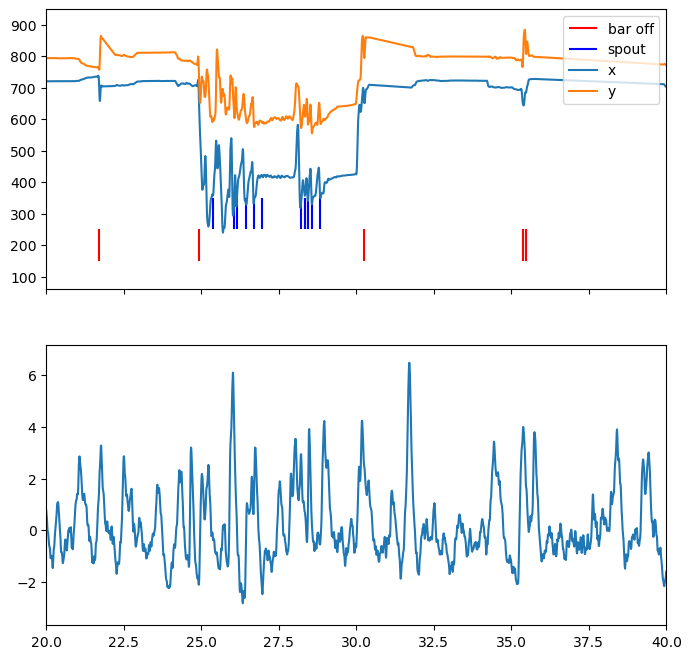

In [187]:
fig,ax = plt.subplots(2,1,figsize=(8,8), sharex=True)
ax[0].eventplot(df_baroff.time/1000, lineoffsets=200, linelengths=100, color = 'r',label='bar off')

ax[0].eventplot(df_spout.time/1000, lineoffsets=300, linelengths=100, color = 'b',label='spout')

ax[0].plot(t, data[:,0], label='x')
ax[0].plot(t, data[:,1], label='y')

# ax[0].plot(t, speed, label='speed')

ax[0].legend(loc='upper right')

ax[1].plot(t, photo_signal)

ax[0].set(xlim=(20,40))

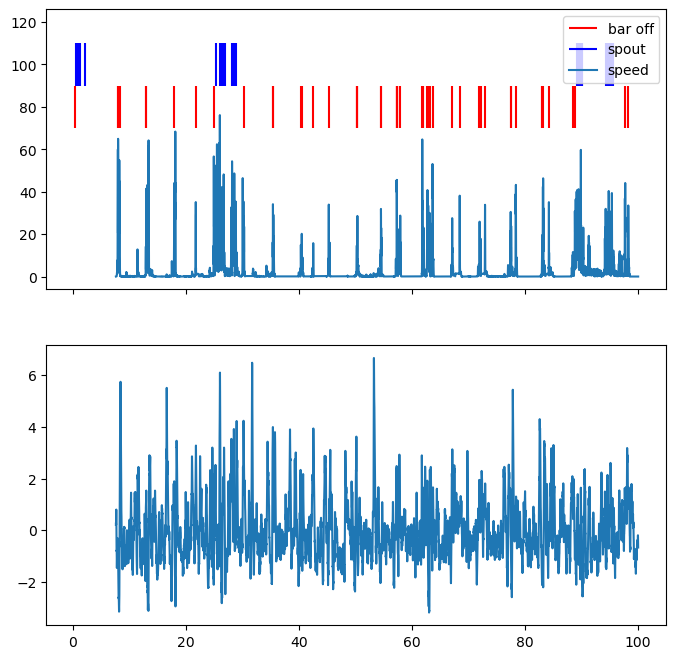

In [189]:
# plot with speed

fig,ax = plt.subplots(2,1,figsize=(8,8), sharex=True)
ax[0].eventplot(df_baroff.time/1000, lineoffsets=80, linelengths=20, color = 'r',label='bar off')

ax[0].eventplot(df_spout.time/1000, lineoffsets=100, linelengths=20, color = 'b',label='spout')


ax[0].plot(t, speed, label='speed')

ax[0].legend(loc='upper right')

ax[1].plot(t, photo_signal)

ax[0].set(xlim=(20,40))

[(80.0, 100.0)]

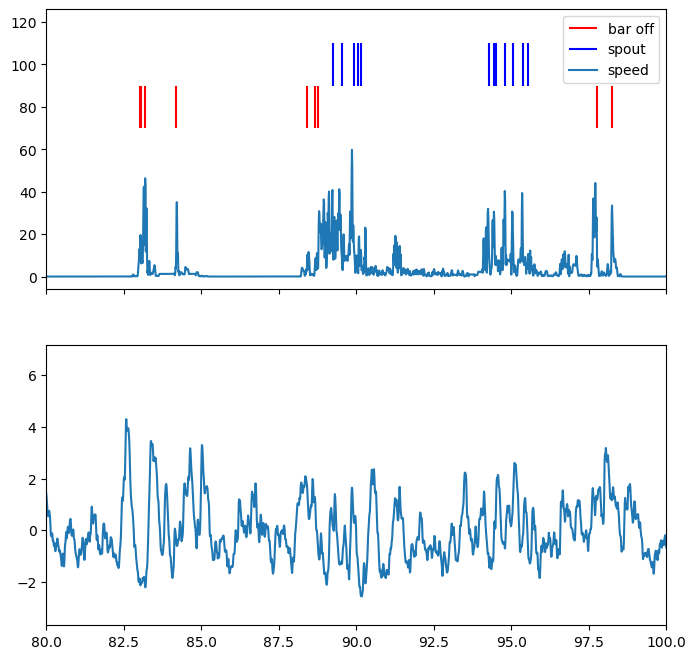

In [190]:
# plot with speed

fig,ax = plt.subplots(2,1,figsize=(8,8), sharex=True)
ax[0].eventplot(df_baroff.time/1000, lineoffsets=80, linelengths=20, color = 'r',label='bar off')

ax[0].eventplot(df_spout.time/1000, lineoffsets=100, linelengths=20, color = 'b',label='spout')


ax[0].plot(t, speed, label='speed')

ax[0].legend(loc='upper right')

ax[1].plot(t, photo_signal)

ax[0].set(xlim=(80,100))